# customer shopping center Dataset 

Creating a project plan for a customer shopping center involves detailing the steps and components required to develop and implement a comprehensive solution. Below is an outline of the key elements to include in such a project:
Dataset Description

Type of Data
The dataset contains both numerical and categorical data related to customer shopping behavior.

File Format
The dataset is provided in an Excel file (customer_shopping_data.xls).

Columns
A brief description of some of the key columns in the dataset:

CustomerID: Unique identifier for each customer.

Type: Numerical
Significance: This column uniquely identifies each customer in the dataset, allowing for the tracking of individual shopping behaviors.
Gender: Gender of the customer (e.g., Male, Female).

Type: Categorical
Significance: Gender can be used to analyze shopping behaviors and preferences between different gender groups.
Age: Age of the customer.

Type: Numerical
Significance: Age can influence shopping habits and preferences. Analyzing age data can help identify trends among different age groups.
Annual Income (k$): Annual income of the customer in thousands of dollars.

Type: Numerical
Significance: Income levels can affect purchasing power and shopping preferences. This column is crucial for segmenting customers based on their income.
Spending Score : Score assigned by the shopping center based on customer behavior and spending nature.

Type: Numerical
Significance: The spending score is an important metric for understanding customer value and loyalty. Higher scores may indicate more frequent or higher value purchases.
Other Potential Columns:

Purchase History: Details of past purchases made by the customer.

Type: Categorical/Numerical
Significance: Analyzing purchase history can provide insights into customer preferences and buying patterns.
Membership Status: Indicates whether a customer is part of a loyalty program.

Type: Categorical
Significance: Membership data can help assess the impact of loyalty programs on shopping behavior.
Feedback: Customer feedback or ratings for products/services.

Type: Text/Categorical
Significance: Feedback can be used to improve products/services and understand customer satisfaction levels.


 Conclusion:
Developing a detailed project plan for a customer shopping center involves careful planning, collaboration, and execution to deliver a successful solution that meets customer needs and business objectives. By following a structured approach and leveraging best practices in software development and project management, you can ensure the project's success and drive positive outcomes for the shopping center and its customers.

In [16]:
import pandas as pd
import numpy as np
import scipy.stats as st
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns


In [17]:
file_path=pd.read_csv('customer_shopping_data.csv')
df=pd.read_csv('customer_shopping_data.csv')

# Load the dataset

In [18]:
df.describe()
#give out information about the project

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


In [19]:
# Display basic information about the dataset

print(df.info())
print(df.head())
print(df.tail())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB
None
  invoice_no customer_id  gender  age  category  quantity    price  \
0    I138884     C241288  Female   28  Clothing         5  1500.40   
1    I317333     C111565    Male   21     Shoes         3  1800.51   
2    I127801     C266599    Male   20  Clothing         1   300.08   
3   

# Segment 1: Frequentist Statistics

In [21]:
x = st.skewnorm.rvs(1, size=1000)
# arg1 default is 1 (normal) above that generate right skweed
# and below it will generate left skweed
# the amount of skeeness depend on the number ratio to size 

array([[<Axes: title={'center': 'price'}>]], dtype=object)

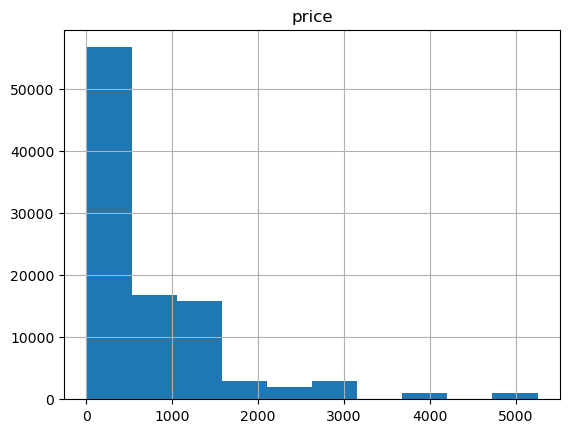

In [12]:
df.hist (['price'])

array([[<Axes: title={'center': 'age'}>]], dtype=object)

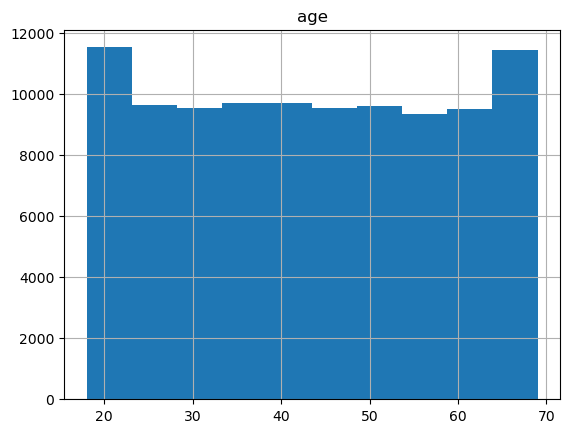

In [13]:
df.hist (['age'])

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


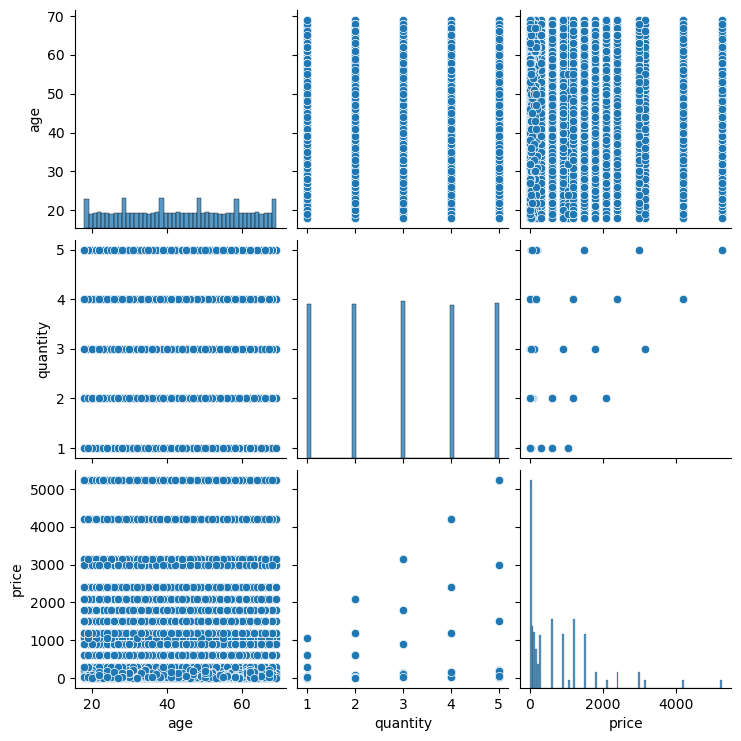

In [63]:
sns.pairplot(df)

In [66]:
pd.crosstab(df['category'] ,df['price'])

price,5.23,10.46,11.73,15.15,15.69,20.92,23.46,26.15,30.30,35.19,...,1200.32,1200.34,1500.40,1800.51,2100.00,2400.68,3000.85,3150.00,4200.00,5250.00
category,,,,,,,,,,,,,,,,,,,,,
Books,0,0,0,985,0,0,0,0,1008,0,...,0,0,0,0,0,0,0,0,0,0
Clothing,0,0,0,0,0,0,0,0,0,0,...,6849,0,6940,0,0,0,0,0,0,0
Cosmetics,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Food & Beverage,3002,2909,0,0,2992,2884,0,2989,0,0,...,0,0,0,0,0,0,0,0,0,0
Shoes,0,0,0,0,0,0,0,0,0,0,...,0,2045,0,2010,0,2022,2013,0,0,0
Souvenir,0,0,1024,0,0,0,984,0,0,1077,...,0,0,0,0,0,0,0,0,0,0
Technology,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1000,0,0,1009,1001,1001
Toys,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


C:\Users\pc\AppData\Local\Temp\ipykernel_24164\3234920688.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Density'>

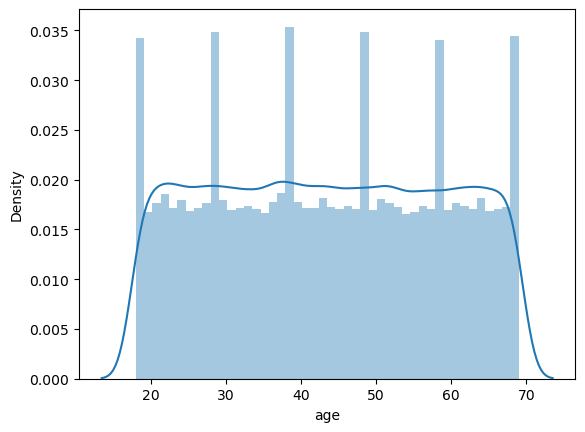

In [22]:
sns.distplot(df['age'])

array([<Axes: title={'center': 'Female'}>,
       <Axes: title={'center': 'Male'}>], dtype=object)

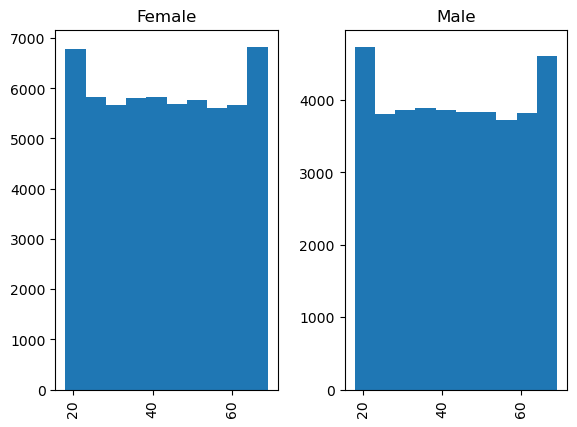

In [23]:
df.hist(by='gender',column='age')

array([<Axes: title={'center': 'Female'}>,
       <Axes: title={'center': 'Male'}>], dtype=object)

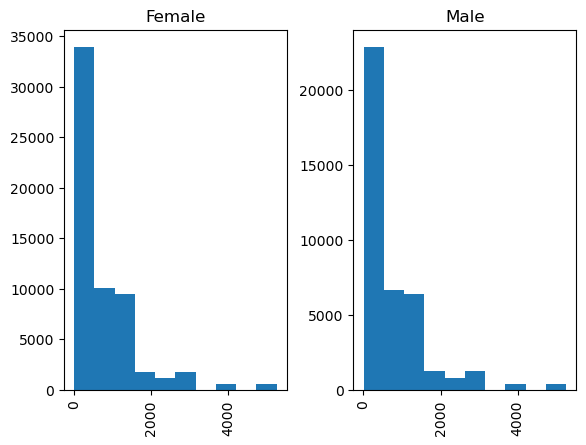

In [24]:
df.hist(by='gender',column='price')

In [28]:
x = st.skewnorm.rvs(1, size=10000)
# arg1 default is 1 (normal) above that generate right skweed
# and below it will generate left skweed
# the amount of skeeness depend on the number ratio to size 

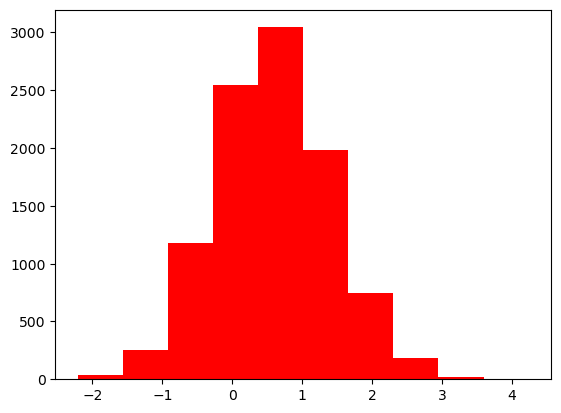

In [31]:
fig, ax = plt.subplots()
_ = plt.hist(x, color = 'red')

In [45]:
xbar = x.mean()
xbar

0.5782140006821728

In [46]:
np.median(x) 

0.5624881471975769

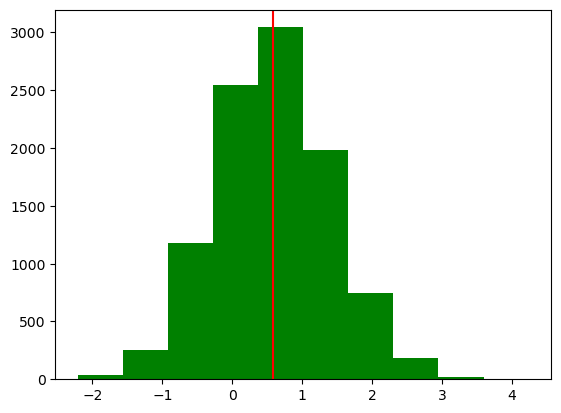

In [47]:
fig, ax = plt.subplots()
plt.axvline(x = x.mean(), color='red')
_ = plt.hist(x, color = 'green')

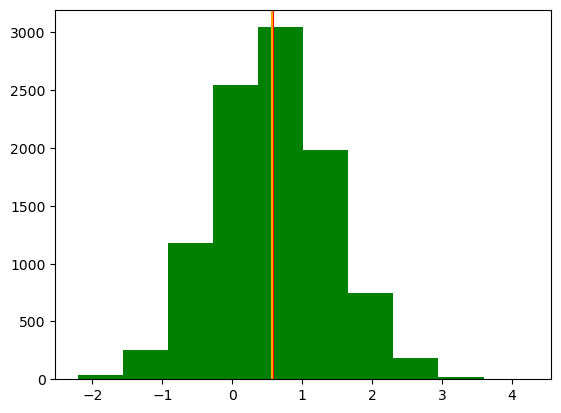

In [48]:
fig, ax = plt.subplots()
plt.axvline(x = np.mean(x), color='red')
plt.axvline(x = np.median(x), color='orange')
_ = plt.hist(x, color = 'green')

### Measures of Dispersion


In [49]:
html

NameError: name 'html' is not defined

In [50]:
html rule

SyntaxError: invalid syntax (2296760808.py, line 1)

In [51]:
x.var()

0.6672688175557827

In [52]:
Standard Deviation¶ html

SyntaxError: invalid character '¶' (U+00B6) (1448096655.py, line 1)

In [53]:
html st rule

SyntaxError: invalid syntax (4256827014.py, line 1)

In [54]:
x.var()**(1/2)

0.8168652383078758

In [55]:
sigma = x.std()
sigma

0.8168652383078758

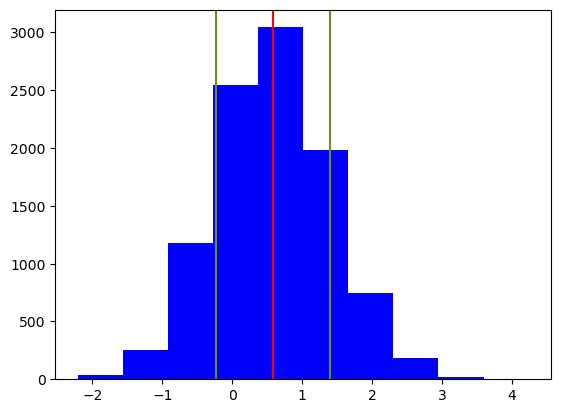

In [57]:
ig, ax = plt.subplots()
plt.axvline(x = xbar, color='red')
plt.axvline(x = xbar+sigma, color='olivedrab')
plt.axvline(x = xbar-sigma, color='olivedrab')
_ = plt.hist(x, color = 'blue')

In [ ]:
standarrd eror html

In [ ]:
rule html

In [58]:
sigma/(x.size)**(1/2)

0.008168652383078758

In [59]:
st.sem(x) # defaults to 1 degree of freedom, which can be ignored with the larger data sets of ML

0.008169060846332912

In [60]:
st.sem(x, ddof=0)

0.008168652383078758

In [ ]:
guassian ditrsbution html

# z-scores

In [61]:
x_i = 80
mu = 75
sigma = 3

In [63]:
x = np.random.normal(mu, sigma, 10000)

D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


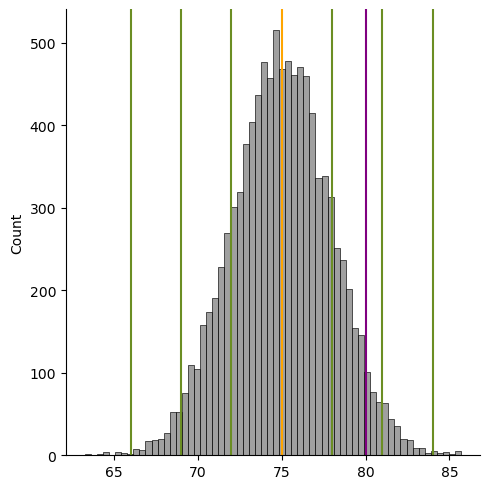

In [64]:
sns.displot(x, color='gray')
plt.axvline(mu, color='orange')
for v in [-3, -2, -1, 1, 2, 3]:
    plt.axvline(mu+v*sigma, color='olivedrab')
_ = plt.axvline(x_i, color='purple')

In [85]:
z = (x_i - mu)/sigma
z

1.6666666666666667

our Z score is 1.6 sd above mean

In [87]:
z = (x_i - np.mean(x))/np.std(x)
z

1.6595590533270879

In [88]:
len(np.where(x > 80)[0])

492

In [65]:
100*492/10000

4.92

In [66]:
np.percentile(x, 99)

81.86306576259064

In [67]:
mu = 90
sigma = 2

In [68]:

y = np.random.normal(mu, sigma, 10000)

D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


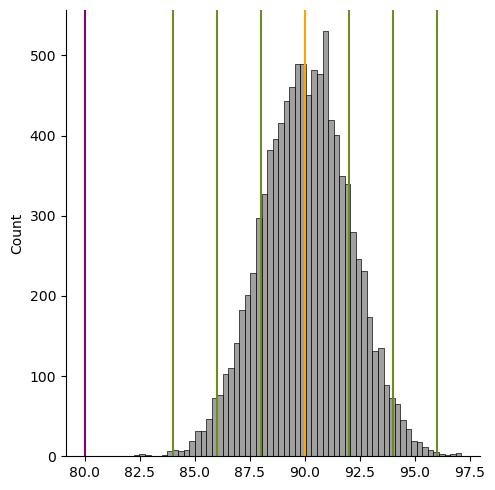

In [69]:
sns.displot(y, color='gray')
plt.axvline(mu, color='orange')
for v in [-3, -2, -1, 1, 2, 3]:
    plt.axvline(mu+v*sigma, color='olivedrab')
_ = plt.axvline(x_i, color='purple')

In [71]:
z = (x_i - mu)/sigma
z


-5.0

-5 sd below mean

<div class="alert alert-block alert-success">
<b>25/4/24</b> 
</div>

# p-scores


In [72]:
p_below = st.norm.cdf(-2.5)
p_below

0.006209665325776132

In [73]:
p_below*10000

62.096653257761325

D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


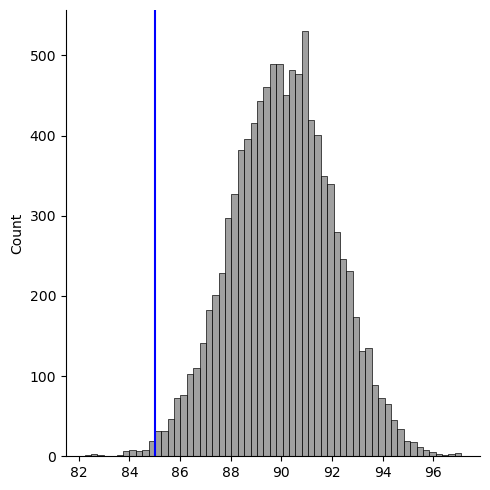

In [74]:
sns.displot(y, color='gray')
_ = plt.axvline(mu-2.5*sigma, color='blue')

In [75]:
st.norm.cdf(2.5)

0.9937903346742238

In [76]:
p_above = 1-st.norm.cdf(2.5)
p_above

0.006209665325776159

In [77]:
p_above*10000

62.09665325776159

D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


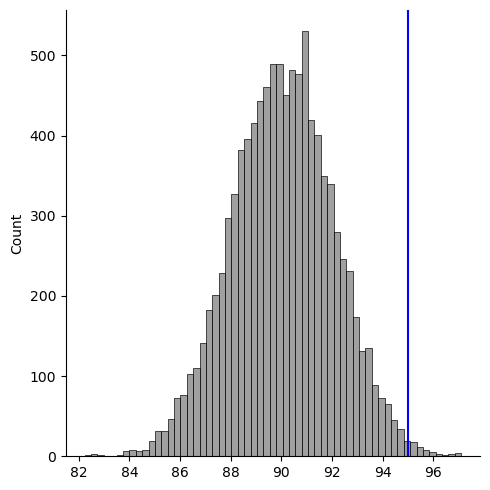

In [78]:
sns.displot(y, color='gray')
_ = plt.axvline(mu+2.5*sigma, color='blue')

In [79]:
p_outside = p_below + p_above
p_outside

0.01241933065155229

In [80]:
p_outside*10000

124.1933065155229

D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


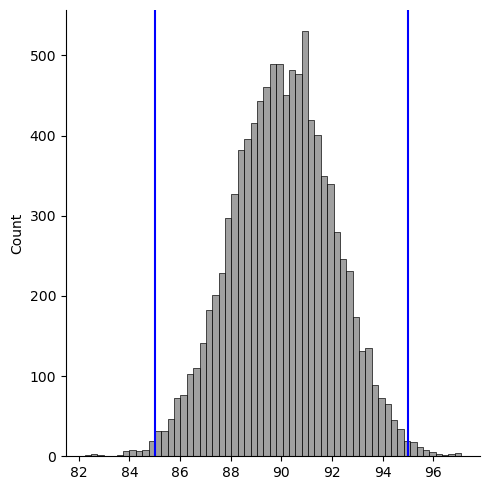

In [81]:
sns.displot(y, color='gray')
plt.axvline(mu+2.5*sigma, color='blue')
_ = plt.axvline(mu-2.5*sigma, color='blue')

compareing mean with t-scoe
html

In [82]:
x = [50, 70, 84, 90]

In [83]:
xbar = np.mean(x)
xbar

73.5

In [84]:
sx = st.sem(x)
sx

8.88350531415762

In [85]:
t = (xbar-50)/sx
t

2.645352163244402

In [86]:
# my_n is number of observation that you wnat to compare it to the mean

def p_from_t(my_t, my_n):
    return 2 * st.t.cdf(-abs(my_t), my_n-1) # 2nd arg to t.cdf() is "degrees of freedom"

In [87]:
# when p_value is <0.5 mean the provided observation
# is not significantly differ from the provided mean
p_from_t(t, len(x))

0.07730070297314764

In [88]:
st.ttest_1samp(x, 50)

TtestResult(statistic=2.6453521632444024, pvalue=0.07730070297314762, df=3)

wlench t score html